<a href="https://colab.research.google.com/github/Wishmiii/Colombo-Travel-Route-Optimizer/blob/main/MathCW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import sympy as sp # For symbolic mathematics
import numpy as np # For numeric mathematics
import matplotlib.pyplot as plt # For plotting
import cv2
from numpy.fft import fftshift, fftfreq, fft, fft2


#Q 1 - Modelling Travel Time

Let:
- x =total route distance (in km)
- y =traffic delay factor (in minutes per km)

The travel time for each mode of transport is modelled as:



The function for Bus travel time:


$$
T_b(x,y) = ax^2 +by^2
$$


The function for Taxi travel time:
$$
T_t(x,y) = \sqrt{c(x^2+y^2)}
$$

where:
- a reflects the effect of distance on bus travel time (stops, boarding times).
- b reflects the effect of congestion on bus travel time.
1
- c is a proportionality constant converting combined effects into minutes for taxis.

##Part a - Gradient Calculation for each mode

In [67]:
sp.init_printing()

#Define variables
x,y = sp.symbols('x y',real=True)
a,b,c = sp.symbols('a b c',positive=True)

#------------------------Bus Travel Time Model-------------------

#Bus travel time function
T_b = a*x**2 + b*y**2

#Computing partial differetiation
T_b_x = sp.diff(T_b, x)
T_b_y = sp.diff(T_b, y)

# Gradient for Bus Travel Time
gradient_T_bus = sp.Matrix([T_b_x, T_b_y])
print("Gradient of Bus Travel Time Model = \n")
sp.pprint(gradient_T_bus)


#------------------------Taxi Travel Time Model-------------------

#Taxi travel time function
T_t = sp.sqrt(c*(x**2 + y**2))

#Computing partial differetiation
T_t_x = sp.diff(T_t, x)
T_t_y = sp.diff(T_t, y)

# Gradient for Taxi Travel Time
gradient_T_taxi = sp.Matrix([T_t_x, T_t_y])
print("\n\nGradient of Bus Travel Time Model = \n")
sp.pprint(gradient_T_taxi)




Gradient of Bus Travel Time Model = 

⎡2⋅a⋅x⎤
⎢     ⎥
⎣2⋅b⋅y⎦


Gradient of Bus Travel Time Model = 

⎡    √c⋅x    ⎤
⎢────────────⎥
⎢   _________⎥
⎢  ╱  2    2 ⎥
⎢╲╱  x  + y  ⎥
⎢            ⎥
⎢    √c⋅y    ⎥
⎢────────────⎥
⎢   _________⎥
⎢  ╱  2    2 ⎥
⎣╲╱  x  + y  ⎦


Bus Travel Time Modal:

Gradient:
$$
\nabla T(x,y) = (2ax,2by)
$$

<br>

Taxi Travel Time Modal:

Gradient:


\begin{aligned}
\nabla T(x,y)
&= \left(
  \frac{\sqrt c\,x}{\sqrt{x^2+y^2}}, \frac{\sqrt c\,y}{\sqrt{x^2+y^2}}
  \right)\\
&= \left(
  \frac{c\,x}{\sqrt{c(x^2+y^2)}}, \frac{c\,y}{\sqrt{c(x^2+y^2)}}
  \right)
\end{aligned}



##Part b - Interpretation


Gradient components reveal how travel time changes with respect to distance (x) and congestion (y).

#Bus Travel Time Gradient


$$
\nabla T(x,y) = (2ax,2by)
$$


 - 2ax - effect of distance
 - 2by - effect of congestion

According to gradient, distance and congestion affect bus travel time independently. Factor with stronger impact is decide by both,

- coefficients a and b
- values of x and y

Meaning, if distance and congestion are similar,
- when a > b, distance dominates
- when b > a, congestion dominates

Therefore, the strongest factor is decided by the combined effect of the given variable's magnitude and coeffient.


<br>
<br>

#Taxi Travel Time Gradient


$$
\nabla T(x,y) = \left(
  \frac{cx}{\sqrt{c(x^2+y^2)}}, \frac{cy}{\sqrt{c(x^2+y^2)}}
  \right)
$$

Both gradient components share the same denominator indicating that distance and congestion contribute symmetrically. Therefore, the taxi time is not dominated by one variable indipendently. Instead, travel time depends on overall combined effect of both distance and congestion.

#Q 2 - Cost Analysis Using Integration

Fare Rate Functions ( cost per km)


Bus:

$$
F_b(x) = ∫_0^x (2t+1) dt
$$


Taxi:

$$
F_t(x) = ∫_0^x (3t+2) dt
$$

where:



*   t  =  distance travelled (km)
*   integrand = incremental cost per km







##Part a Integral Calculation

In [68]:
#Define variables
t = sp.symbols('t',real=True, nonnegative=True)

#------------------------Bus Travel Time Model-------------------

#Bus fare rate function
F_b = 2*t + 1

#Integrating
tot_fare_bus = sp.integrate(F_b, (t,0,x))

print("Bus Fare =\n")
sp.pprint(tot_fare_bus)

#------------------------Taxi Travel Time Model-------------------

#Taxi fare rate function
F_t = 3*t + 2

#Integrating
tot_fare_taxi = sp.integrate(F_t, (t,0,x))

print("\n\nTaxi Fare =")
sp.pprint(tot_fare_taxi)



Bus Fare =

 2    
x  + x


Taxi Fare =
   2      
3⋅x       
──── + 2⋅x
 2        


Part a - Answers

$$
Bus Fare = x^2 + x
$$

$$
Taxi Fare = 3x^2 + 2x
$$

##Part b - Plotting each fare against distance (0-5km)

In [69]:
#Converting symbolic SymPy expression into a NumPy compatible numeric function
tot_fair_bus = sp.lambdify(x, tot_fare_bus, 'numpy')
tot_fair_taxi = sp.lambdify(x, tot_fare_taxi, 'numpy')

# Setting distance range
distance =np.linspace(0,5,100)


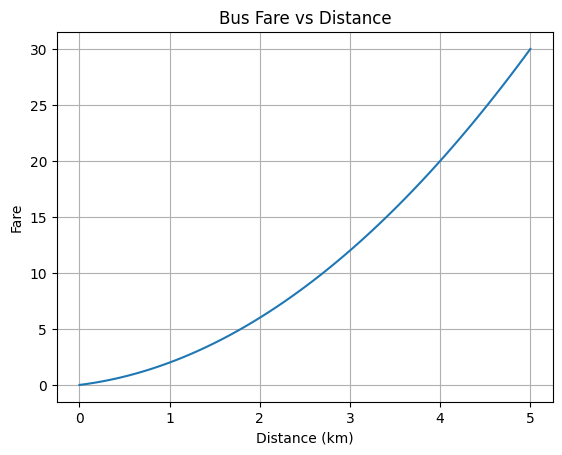

In [70]:
#plot
plt.figure()
plt.plot(distance, tot_fair_bus(distance))
plt.xlabel('Distance (km)')
plt.ylabel('Fare')
plt.title('Bus Fare vs Distance')
plt.grid(True)
plt.show()

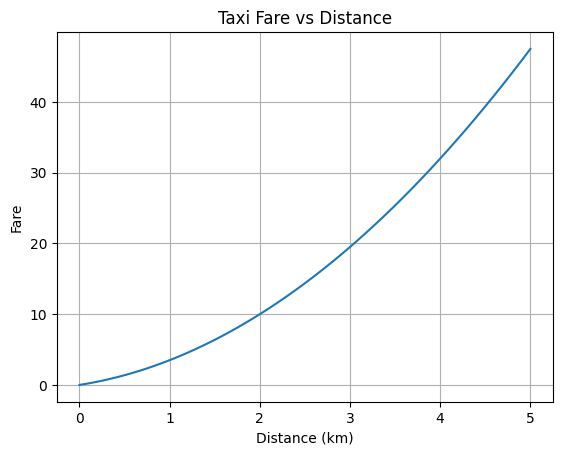

In [71]:
#plot
plt.figure()
plt.plot(distance, tot_fair_taxi(distance))
plt.xlabel('Distance (km)')
plt.ylabel('Fare')
plt.title('Taxi Fare vs Distance')
plt.grid(True)
plt.show()

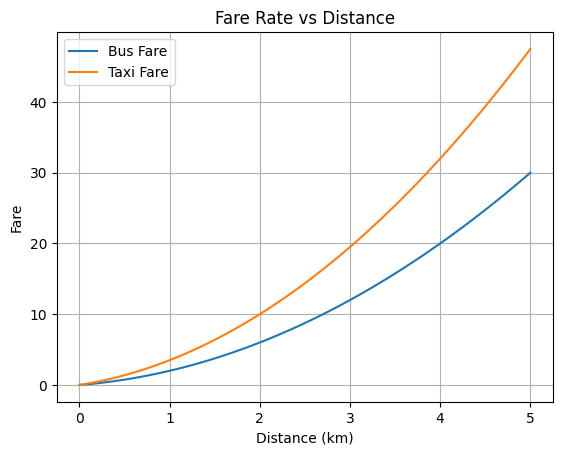

In [72]:
plt.figure()
plt.plot(distance, tot_fair_bus(distance),label='Bus Fare')
plt.plot(distance, tot_fair_taxi(distance),label='Taxi Fare')
plt.xlabel('Distance (km)')
plt.ylabel('Fare')
plt.title('Fare Rate vs Distance')
plt.legend()
plt.grid(True)
plt.show()


##Part c - Interpretation

Both fare functions contain  quadratic terms indicating an accelerating increase in the cost which is reflected by upward curve plots.

The taxi plot shows a steeper curve due to it's larger quadratic coefficient and linear term compared to bus fare function, resulting in a widening gap between bus and taxi fare curves as distance increases.

This positive and increasing difference is confirmed by,
$$
F_t(x) - F_b(x) = \frac {1}{2}x^2 + x
$$


Longer the journey becomes, the more expensive taxi gets compared to bus.

In conclution, buses remain the most affordable option for any distance.  However, when speed, comfort and convenience is prioritised taxi can be suitable for shorter distance journeys given the smaller extra cost.



#Q 3 - Predicting Peak Travel Times Using Series Convergence

Passanger volume p(t) is modelled by:
$$
P(t) = 5 + 4\sin(\pi t) - \frac {3}{2} t^2 + \frac {t^4}{4} + ..., t \in [0,24]
$$

##Part a - Approximation of P(t) using first 4 terms for t_hrs ∈ [0,24]



Terms:

$$
P_t =  5 + 4 \sin(\pi t) - \frac {3}{2} t^2 + \frac {t^4}{4}
$$




In [73]:
#Setting time range
t_hrs=np.linspace(0,24,1000)

In [74]:
# Approximating first 4 terms of the passanger volume function
P_t = 5 + (4*np.sin(np.pi * t_hrs))- ((3/2)*t_hrs**2)+((t_hrs**4/4))

##Part b

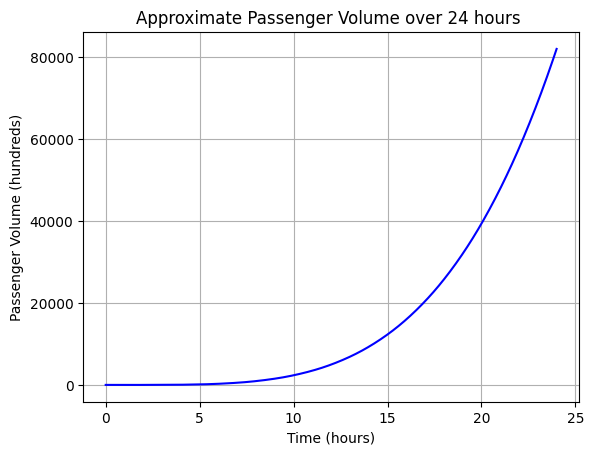

In [75]:
# Plotting passenger volume over 24 hours
plt.figure()
plt.plot(t_hrs,P_t, color='blue')
plt.xlabel('Time (hours)')
plt.ylabel('Passenger Volume (hundreds)')
plt.title('Approximate Passenger Volume over 24 hours ')
plt.grid(True)
plt.show()

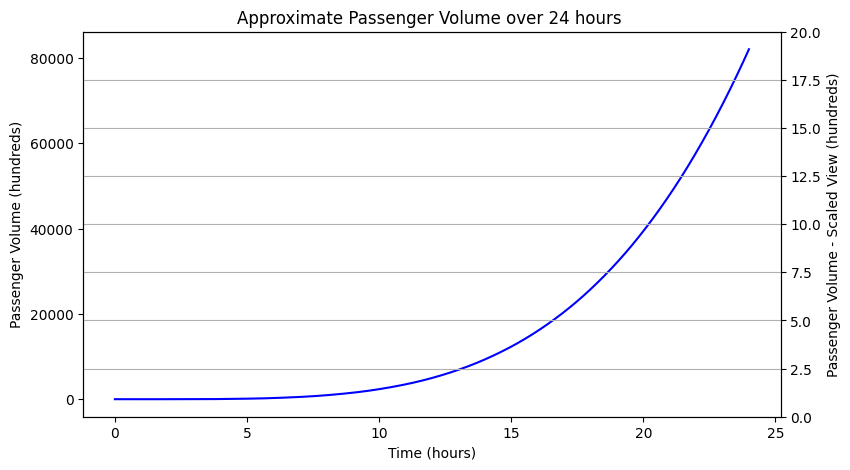

In [76]:
# Adding a scaled y axis to reveal the early hour passanger volume behaviour, which is hidden due to rapid growth later in the day
fig, ax1 = plt.subplots(figsize=(9,5))

ax1.plot(t_hrs, P_t, color='blue')
ax1.set_xlabel('Time (hours)')
ax1.set_ylabel('Passenger Volume (hundreds)')
ax1.set_title('Approximate Passenger Volume over 24 hours ')

ax2 = ax1.twinx()
ax2.set_ylabel('Passenger Volume - Scaled View (hundreds)')
ax2.set_ylim(0,20)

plt.grid(True)
plt.show()


##Part c

##Peak Identification

In [77]:
#Computing derivative
dt = np.gradient(P_t, t_hrs)

#Identify sign changes from + to -
peaks = np.where((dt[:-1] > 0)& (dt[1:] < 0))[0]

print("Peaks Found:")
if len(peaks)==0:
  print("No peaks found")
else:
  for i in peaks:
    print(f"  - Peak at time {t_hrs[i]:.2f} hours = {P_t[i]:.2f}")

Peaks Found:
  - Peak at time 0.46 hours = 8.66


The peak identification,identifies a single peak at approximately 0.46 hours with a passanger volume of 8.66 hundreds.

This peak appears in the initial part of the plot where the sinusoidal term in the series still affects the passenger volume and introduces oscillations. However, as time increases the series is dominated by the higher-order polynomial term $(t^4)$ causing a rapid and monotonous growth in passenger volume with no fluctuations.


This indicates truncated  approximation is only effective for a short time range and highlights limitations of truncating a series that contains a higher order polynomial term .




#Q 4 - Travel Pattern Analysis Using Fourier Transform

##Part a


#Simulating data counts for buses and taxis




*   bus_boarding_counts - no of people boarding buses at each time point
*   taxi_boarding_counts - no of people boarding taxis at each time point

Each variable is an array of numbers with one number for every 5 minutes between 6AM and 9 PM


In [78]:
# data is collected every 5mins, 5/60 converts it to hours
collection_interval = 5/60

# Data is collected from 6am to 9pm
tot_hours = 15

#(15 hours x 12 intervals) or (15hours / (5/60)) = 180 boarding counts are collected
no_boarding_counts = int(tot_hours/collection_interval)

#time axis has no_boarding_counts no of evenly spaced time values
time_axis = np.linspace(0,tot_hours,no_boarding_counts)


bus_boarding_counts = (
    50 #Baseline
    + 40*np.sin(2*np.pi * time_axis / 15 + np.pi/4) #Daily Cycle
    + 35*np.sin(2*np.pi * time_axis / 7.5) #Rush hours - twice a day
    +np.random.normal(0,5,no_boarding_counts) #Random Peak
)

taxi_boarding_counts = (
    30 #Baseline
    + 40*np.sin(2*np.pi * time_axis / 15 +np.pi/4)
    + 10*np.sin(2*np.pi * time_axis / 7.5)
    +np.random.normal(0,5,no_boarding_counts)
)

#Applying Fast Fourier Transform
bus_fft = fft(bus_boarding_counts)
taxi_fft = fft(taxi_boarding_counts)

#Calculating Frequencies
freq = fftfreq(no_boarding_counts, d=collection_interval)

#Getting positive frequencies only
positive_freq = freq[freq > 0]
bus_magnitude = np.abs(bus_fft[freq > 0])
taxi_magnitude = np.abs(taxi_fft[freq > 0])



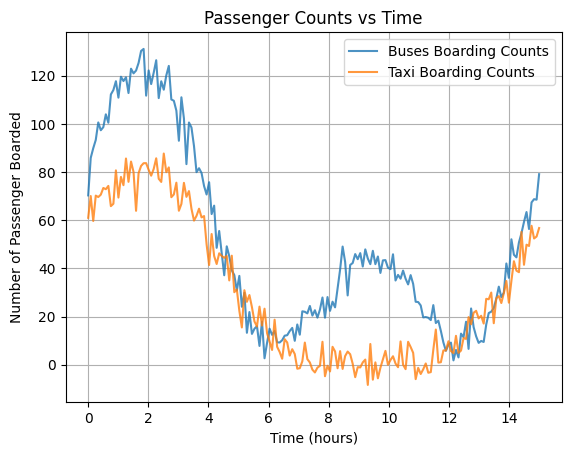

In [79]:
#A time-domain plot - peaks of passenger volume in synthesized data can be observed
plt.figure()
plt.plot(time_axis, bus_boarding_counts, label='Buses Boarding Counts', alpha=0.8)
plt.plot(time_axis, taxi_boarding_counts, label='Taxi Boarding Counts', alpha=0.8)

plt.xlabel("Time (hours)")
plt.ylabel("Number of Passenger Boarded")
plt.title("Passenger Counts vs Time")
plt.legend()
plt.grid(True)
plt.show()

##Part b

##Identifying dominant frequencies from visualization

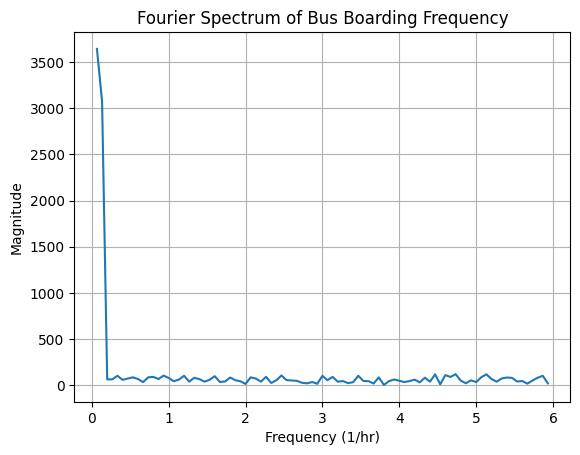

In [80]:
plt.figure()
plt.plot(positive_freq, bus_magnitude)
plt.xlabel('Frequency (1/hr)')
plt.ylabel('Magnitude')
plt.title('Fourier Spectrum of Bus Boarding Frequency')
plt.grid(True)
plt.show()


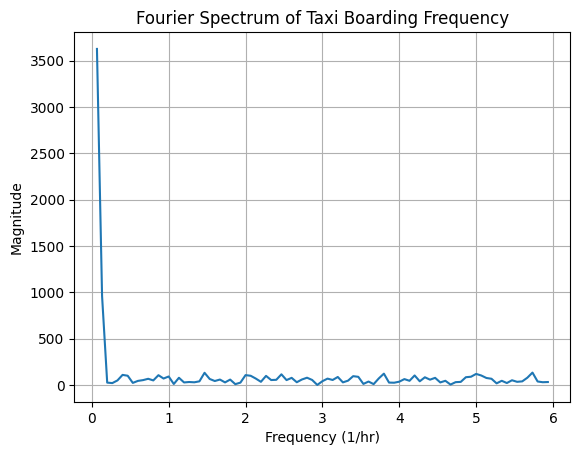

In [81]:
plt.figure()
plt.plot(positive_freq, taxi_magnitude)
plt.xlabel('Frequency (1/hr)')
plt.ylabel('Magnitude')
plt.title('Fourier Spectrum of Taxi Boarding Frequency')
plt.grid(True)
plt.show()


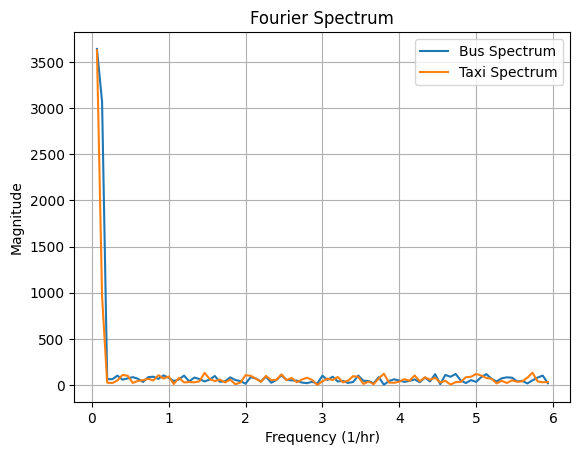

In [82]:
#frequency-domain plot - both modes
plt.figure()
plt.plot(positive_freq, bus_magnitude, label='Bus Spectrum')
plt.plot(positive_freq, taxi_magnitude, label='Taxi Spectrum')

plt.xlabel("Frequency (1/hr)")
plt.ylabel("Magnitude")
plt.title("Fourier Spectrum")
plt.legend()
plt.grid(True)
plt.show()

##Numerically Identifying dominant frequencies

In [83]:
# Identify top dominant frequencies for buses
bus_peak_indices = np.argsort(bus_magnitude)[-3:]
bus_dominant_freqs = positive_freq[bus_peak_indices]

# Identify top dominant frequencies for taxis
taxi_peak_indices = np.argsort(taxi_magnitude)[-3:]
taxi_dominant_freqs = positive_freq[taxi_peak_indices]

print("Dominant frequencies for buses:")
print(bus_dominant_freqs)

print("\nDominant frequencies for taxis:")
print(taxi_dominant_freqs)



Dominant frequencies for buses:
[4.73333333 0.13333333 0.06666667]

Dominant frequencies for taxis:
[5.73333333 0.13333333 0.06666667]


In [84]:
#Finding magnitudes of each dominant frequency
bus_peak_mags = []
taxi_peak_mags = []

for freq in bus_dominant_freqs:
  mag = np.argmin(np.abs(positive_freq - freq))
  bus_peak_mags.append(bus_magnitude[mag])

#displaying magnitudes
print("Magnitudes corresponding to dominant frquencies")
for freq,mag in zip(bus_dominant_freqs, bus_peak_mags):
  print(f"Bus Frequency {freq:.4f} -> magnitude {mag:.4f}")

for freq in taxi_dominant_freqs:
  mag = np.argmin(np.abs(positive_freq - freq))
  taxi_peak_mags.append(taxi_magnitude[mag])

print(" ")
#displaying magnitudes
for freq,mag in zip(taxi_dominant_freqs, taxi_peak_mags):
  print(f"Taxi Frequency {freq:.4f} -> magnitude {mag:.4f}")

Magnitudes corresponding to dominant frquencies
Bus Frequency 4.7333 -> magnitude 120.0329
Bus Frequency 0.1333 -> magnitude 3071.0755
Bus Frequency 0.0667 -> magnitude 3641.7469
 
Taxi Frequency 5.7333 -> magnitude 134.4527
Taxi Frequency 0.1333 -> magnitude 960.1300
Taxi Frequency 0.0667 -> magnitude 3627.0954


##Part c

The strongest dominant frequency for both bus and taxi, 0.0667 cycles per hour translates to approximately 15 hours. This aligns with the daily operating hours according to data collection (6am - 9pm), indicating a strong, daily passenger boarding pattern shared by bus and taxi.

$$
Period(hours) = \frac{1}{frequency (1/hr)}
$$

$$
f=0.667(1/hr)
$$

$$
T=\frac{1}{0.667} = ~ 15hours
$$



The second strongest frequency for both modes, 0.1333 cycles per hours, corresponds to a period of approximately 7.5 hours. This indicates two major strong peaks of passenger boarding per day. This aligns with morning and evening rush hour peaks identified in time-frequency data.

$$
Period(hours)
$$

$$
f=0.1333(1/hr)
$$

$$
T=\frac{1}{0.1333} = ~ 7.5hours
$$


Remaining two higher frequency peaks with weeker magnitudes, represents short-term fluctuations in passanger demand and noise in data with no significance in sheduling.


Considering amplitudes, buses and taxis show similar strength in 15 hour daily travel cycle. However, 7.5 hour cycle, shows significantly lower magnitude in taxi compared to bus. This suggests although taxis experience 2 demand peaks per day, these demand is more distributed and weeker than for buses.

In conclution, strong demand peaks and regular periodic bus passenger demand suggests suitability of fixed
scheduling for buses with more frequent bus availabiliy in two peak demand periods and limited availability during off-peak hours. Taxi demand shows the same overall daily cycle and rush hour peaks, with weeker concentration and higher short-term variability, suggesting the suitability of more flexible and continous taxi availability throught the day with moderate increase around peak hours without strict shedules.


#Q 5 - Image Processing Using Fourier and Discrete Cosine Transforms

##Part a

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


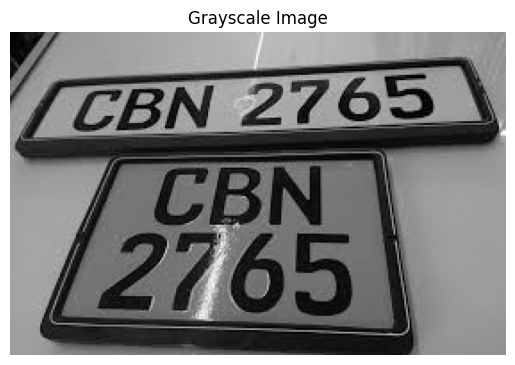

In [85]:
#A) Load the given image
#Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

#read the image
img=cv2.imread('/content/drive/MyDrive/Colab_Notebooks/Maths/mathCW/vehicle_plate.png')

#B) Convert the image in to grayscale
# i. convert from BGR to RGB for display
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

#ii. Convert from BGR to RGB for grayscale
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#Display the grayscale image
plt.figure()
plt.imshow(img_gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis("off")
plt.show()




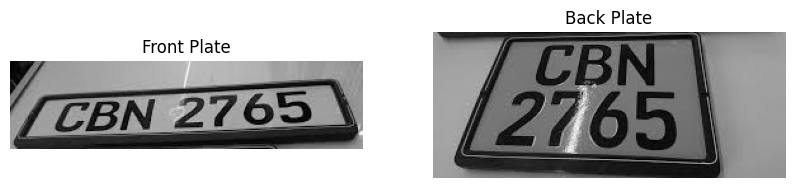

In [86]:
#C) Differentiate between the front and the black plates

# Seperating the two images, using array slicing

height, width = img_gray.shape
split = height//3
overlap_front = int(0.05 * height)
overlap_back = int(0.038 * height)


#Splitting the image by height
front_plate = img_gray[:height//3+overlap_front, :]
back_plate = img_gray[height//3+overlap_back:, :]


#Displaying splitted plates

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.imshow(front_plate, cmap='gray')
plt.title('Front Plate')
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(back_plate, cmap='gray')
plt.title('Back Plate')
plt.axis("off")

plt.show()


##Part b

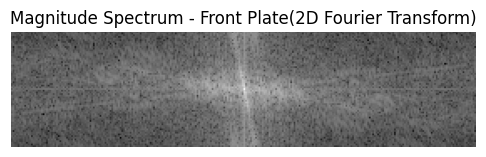

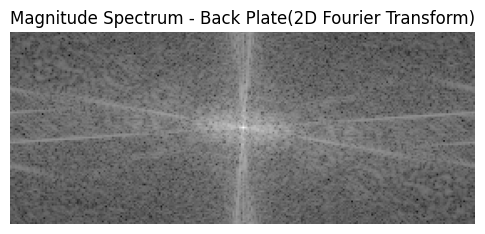

In [87]:
#Apply 2D Fourier transform to the both images

def fourier_shifting_magnitude(image):
  # Apply 2D Fourier Transform
  fourier_transformed_gray = fft2(image)

  # Shifting the zero-frequency to the centre
  fshift = fftshift(fourier_transformed_gray)

  #Computing the Magnitude spectrum
  magnitude_spectrum = np.log(np.abs(fshift)+1)

  return magnitude_spectrum

front_magnitude_spectrum = fourier_shifting_magnitude(front_plate)
back_magnitude_spectrum = fourier_shifting_magnitude(back_plate)

#Visualizing the magnitude spectrum for front and back plates
plt.figure(figsize=(6,6))
plt.imshow(front_magnitude_spectrum,cmap='gray')
plt.title('Magnitude Spectrum - Front Plate(2D Fourier Transform)')
plt.axis('off')
plt.show()

plt.figure(figsize=(6,6))
plt.imshow(back_magnitude_spectrum,cmap='gray')
plt.title('Magnitude Spectrum - Back Plate(2D Fourier Transform)')
plt.axis('off')
plt.show()



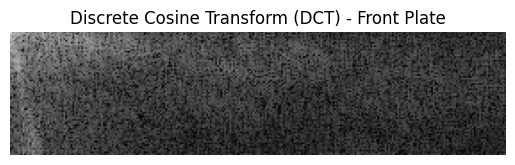

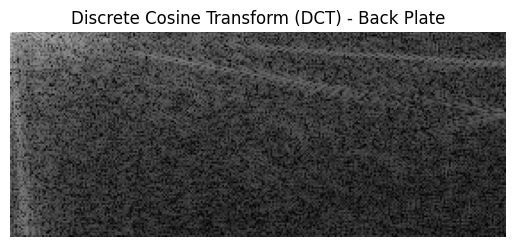

In [88]:
# DCT Transformation was also added to as the marking rubic mentions 'Correct application of BOTH transforms'
def dct(image):
  float_plate = np.float32(image)
  dct_plate = cv2.dct(float_plate)
  dct_visual = np.log(np.abs(dct_plate)+ 1)
  return dct_visual

dct_front_visual = dct(front_plate)
dct_back_visual = dct(back_plate)

plt.figure()
plt.imshow(dct_front_visual, cmap="gray")
plt.title("Discrete Cosine Transform (DCT) - Front Plate")
plt.axis("off")
plt.show()

plt.figure()
plt.imshow(dct_back_visual, cmap="gray")
plt.title("Discrete Cosine Transform (DCT) - Back Plate")
plt.axis("off")
plt.show()


##Part c

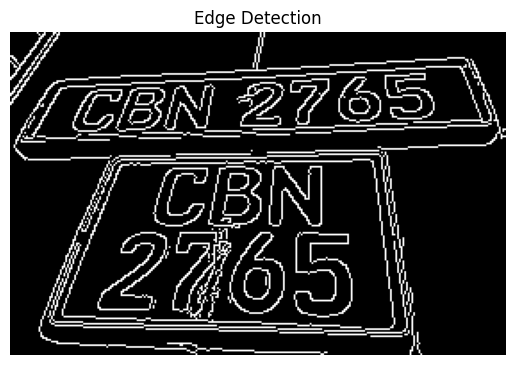

In [89]:
#Edge Detection
edges = cv2.Canny(img_gray, 100, 200)

#Display edges
plt.figure()
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection')
plt.axis("off")
plt.show()


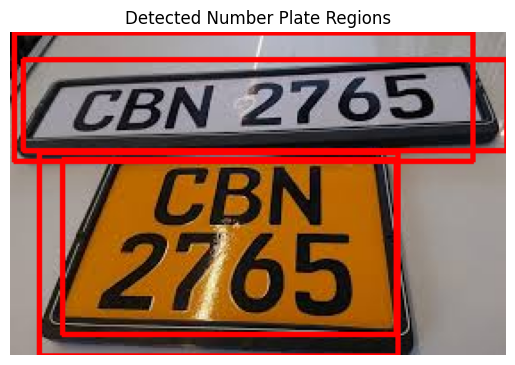

In [90]:
#Find contours
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

plates_detected = img_rgb.copy()

for contour in contours:
  x,y,w,h = cv2.boundingRect(contour)
  aspect_ratio = w/h
  area = w*h

  #Heuristic filtering for number plate shape
  if 1.5 < aspect_ratio < 6 and area > 1500:
    cv2.rectangle(plates_detected,(x,y), (x+w, y+h),(255,0,0), 2)

plt.figure()
plt.imshow(plates_detected)
plt.title('Detected Number Plate Regions')
plt.axis('off')
plt.show()

##Part d

i.

Grayscale transformation removes colour information, emphasising luminance of image. This highlights high density structural elements such as edges, characters and plate boundries against image background.


2D Fourier Transform reveals spatial frequency composition of image and it's magnitude spectrum clearly highlights Low-frequency components that represent smooth background regions and  high-frequency components that represnts sharp edges and text. These features are essential for distinguishing number plates from surrounding background.

The DCT provides a compact representation of image by concentrating most of signal energy in image into a small number of low-freqeuncy coefficients, preserving essential structural information effectively.


ii.


In number plate recognition systems, Fourier analysis aids in robust identification edges and repetitive patterns associated with plate text, under differnt lighting and noise conditions. DCT facilitates compact storage and fast processing of plate features.


iii.


In traffic optimization systems, these techniques are used for automated vehicle recognition which  enables continous vehicle flow monitoring, vehcile flow pattern and congesion pattern identification. These information helps optimize traffic signal timings, route planing and overall enhancement of traffic efficienty

